In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the Data

In [2]:
cancer_data = pd.read_csv('./BreastCancerData/wdbc.data', names=["id","diagnosis","radius_mean","texture_mean","perimeter_mean","area_mean","smoothness_mean","compactness_mean","concavity_mean","concave points_mean","symmetry_mean","fractal_dimension_mean","radius_se","texture_se","perimeter_se","area_se","smoothness_se","compactness_se","concavity_se","concave points_se","symmetry_se","fractal_dimension_se","radius_worst","texture_worst","perimeter_worst","area_worst","smoothness_worst","compactness_worst","concavity_worst","concave points_worst","symmetry_worst","fractal_dimension_worst"])

In [3]:
cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [4]:
file = open('./BreastCancerData/wdbc.names')
print(file.read())

1. Title: Wisconsin Diagnostic Breast Cancer (WDBC)

2. Source Information

a) Creators: 

	Dr. William H. Wolberg, General Surgery Dept., University of
	Wisconsin,  Clinical Sciences Center, Madison, WI 53792
	wolberg@eagle.surgery.wisc.edu

	W. Nick Street, Computer Sciences Dept., University of
	Wisconsin, 1210 West Dayton St., Madison, WI 53706
	street@cs.wisc.edu  608-262-6619

	Olvi L. Mangasarian, Computer Sciences Dept., University of
	Wisconsin, 1210 West Dayton St., Madison, WI 53706
	olvi@cs.wisc.edu 

b) Donor: Nick Street

c) Date: November 1995

3. Past Usage:

first usage:

	W.N. Street, W.H. Wolberg and O.L. Mangasarian 
	Nuclear feature extraction for breast tumor diagnosis.
	IS&T/SPIE 1993 International Symposium on Electronic Imaging: Science
	and Technology, volume 1905, pages 861-870, San Jose, CA, 1993.

OR literature:

	O.L. Mangasarian, W.N. Street and W.H. Wolberg. 
	Breast cancer diagnosis and prognosis via linear programming. 
	Operations Research, 43(4), pag

# Prepare the Data

In [5]:
cancer_data.drop('id', axis=1, inplace=True)

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
lencoder = LabelEncoder()

In [8]:
cancer_data.iloc[:, 0] = lencoder.fit_transform(cancer_data.iloc[:, 0])

# Analyze the Data

Correlation betwen the output category and all the columns

In [9]:
cancer_data.corr().iloc[0, :]

diagnosis                  1.000000
radius_mean                0.730029
texture_mean               0.415185
perimeter_mean             0.742636
area_mean                  0.708984
smoothness_mean            0.358560
compactness_mean           0.596534
concavity_mean             0.696360
concave points_mean        0.776614
symmetry_mean              0.330499
fractal_dimension_mean    -0.012838
radius_se                  0.567134
texture_se                -0.008303
perimeter_se               0.556141
area_se                    0.548236
smoothness_se             -0.067016
compactness_se             0.292999
concavity_se               0.253730
concave points_se          0.408042
symmetry_se               -0.006522
fractal_dimension_se       0.077972
radius_worst               0.776454
texture_worst              0.456903
perimeter_worst            0.782914
area_worst                 0.733825
smoothness_worst           0.421465
compactness_worst          0.590998
concavity_worst            0

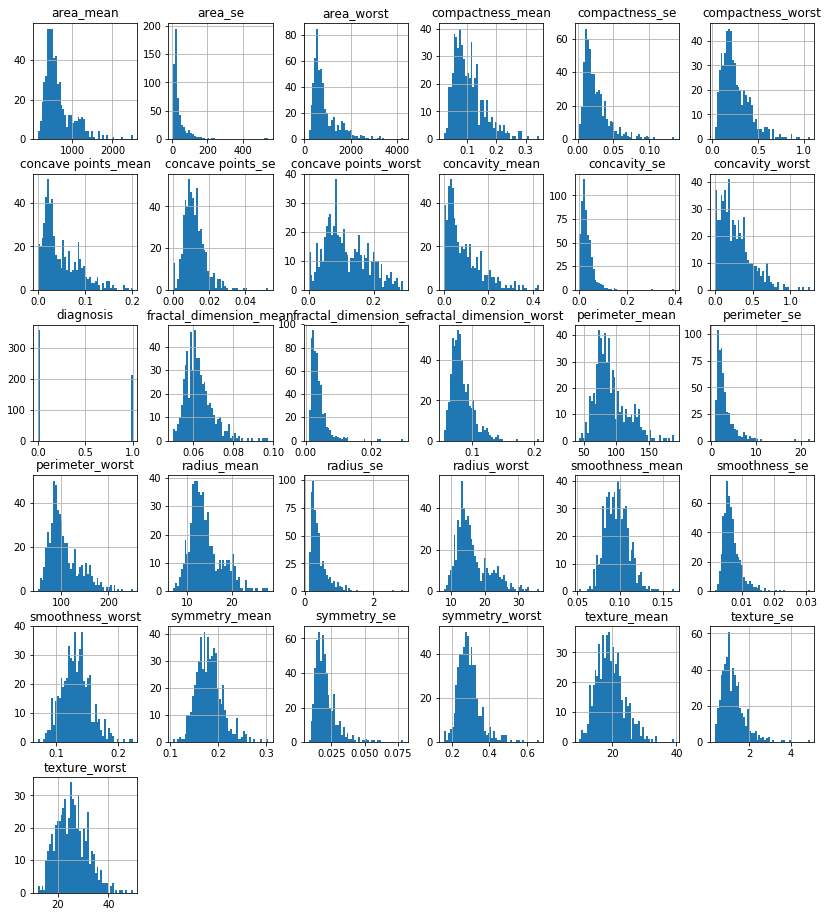

In [22]:
cancer_data.hist(bins=50, figsize=(14, 16))
plt.show()

# Split the Data

In [87]:
from sklearn.model_selection import train_test_split

In [89]:
X_IN = cancer_data.iloc[:, 1:]
Y_OUT = cancer_data.iloc[:, 0]

In [90]:
X_TRAIN, X_TEST, Y_TRAIN, Y_TEST = train_test_split(X_IN, Y_OUT)

In [92]:
X_TRAIN.head(1)

2      3      4       5       6       7      8        9       10  \
565  20.13  28.25  131.2  1261.0  0.0978  0.1034  0.144  0.09791  0.1752   

          11  ...     22     23     24      25      26      27      28  \
565  0.05533  ...  23.69  38.25  155.0  1731.0  0.1166  0.1922  0.3215   

         29      30       31  
565  0.1628  0.2572  0.06637  

[1 rows x 30 columns]

In [93]:
Y_TRAIN.head(1)

565    1
Name: 1, dtype: int64

# Feature Scaling

In [94]:
from sklearn.preprocessing import StandardScaler

In [95]:
scaler = StandardScaler()

In [96]:
scaler.fit(X_TRAIN)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [97]:
X_TRAIN.iloc[:, :] = scaler.transform(X_TRAIN)

/opt/anaconda/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [99]:
X_TEST.iloc[:, :] = scaler.transform(X_TEST)

/opt/anaconda/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [103]:
X_TRAIN.describe().T

count          mean       std       min       25%       50%       75%  \
2   426.0  1.552292e-16  1.001176 -2.086093 -0.702925 -0.215200  0.521823   
3   426.0 -1.026826e-16  1.001176 -2.006945 -0.734309 -0.121172  0.583530   
4   426.0  5.117516e-16  1.001176 -2.040635 -0.705643 -0.221804  0.529621   
5   426.0 -1.902495e-17  1.001176 -1.495292 -0.671239 -0.286332  0.393281   
6   426.0  8.892209e-16  1.001176 -2.424258 -0.722978 -0.026801  0.636259   
7   426.0 -4.169852e-17  1.001176 -1.630509 -0.749034 -0.201163  0.461396   
8   426.0 -1.300473e-16  1.001176 -1.150696 -0.761352 -0.326696  0.581044   
9   426.0  3.388005e-17  1.001176 -1.304556 -0.765672 -0.335913  0.689432   
10  426.0  9.981583e-16  1.001176 -2.354685 -0.689479 -0.055928  0.498542   
11  426.0 -2.866773e-17  1.001176 -1.824283 -0.722965 -0.170912  0.462695   
12  426.0  2.199597e-16  1.001176 -1.109153 -0.642509 -0.283480  0.336911   
13  426.0 -1.438599e-16  1.001176 -1.577998 -0.673287 -0.205143  0.469993   
14  426.0 -3.335881e-17  1.001176 -1.091405 -0.632361 -0.266085  0.293240   
15  426.0  1.102405e-16  1.001176 -0.811742 -0.532615 -0.361590  0.184437   
16  426.0 -3.351518e-16  1.001176 -1.768923 -0.603814 -0.242222  0.348815   
17  426.0  5.381715e-17  1.001176 -1.304524 -0.686529 -0.271494  0.389352   
18  426.0 -8.779493e-17  1.001176 -1.029275 -0.531055 -0.212962  0.292712   
19  426.0 -3.967875e-17  1.001176 -1.939661 -0.646902 -0.139114  0.458260   
20  426.0 -1.154202e-16  1.001176 -1.496791 -0.641302 -0.238593  0.285074   
21  426.0  8.470011e-19  1.001176 -1.080330 -0.584075 -0.245128  0.252041   
22  426.0 -2.856348e-16  1.001176 -1.787734 -0.684669 -0.270088  0.530300   
23  426.0  1.730488e-16  1.001176 -2.138596 -0.710126 -0.086053  0.733270   
24  426.0  2.892835e-17  1.001176 -1.757458 -0.711076 -0.286012  0.570259   
25  426.0 -2.449788e-17  1.001176 -1.286469 -0.667603 -0.335366  0.397057   
26  426.0 -3.137813e-16  1.001176 -2.654687 -0.675348 -0.058352  0.568334   
27  426.0 -3.575648e-16  1.001176 -1.433639 -0.696535 -0.278979  0.536794   
28  426.0 -7.297241e-18  1.001176 -1.312820 -0.766358 -0.238073  0.535129   
29  426.0 -2.267357e-16  1.001176 -1.788043 -0.786232 -0.186983  0.702708   
30  426.0 -7.276391e-16  1.001176 -2.122029 -0.654277 -0.143585  0.445556   
31  426.0  9.955521e-17  1.001176 -1.575379 -0.659703 -0.234919  0.416859   

          max  
2    4.038806  
3    4.613544  
4    4.035853  
5    5.364171  
6    4.647206  
7    4.432007  
8    4.191601  
9    3.910619  
10   4.378032  
11   4.794780  
12   9.354793  
13   6.728892  
14   9.907501  
15  12.042611  
16   8.016666  
17   5.876900  
18  11.269002  
19   6.531898  
20   6.768839  
21   9.298806  
22   3.583710  
23   3.839920  
24   3.736740  
25   4.366010  
26   3.867591  
27   4.844689  
28   4.522317  
29   2.655435  
30   5.837248  
31   6.519947

In [107]:
'There are {} features'.format(len(X_TRAIN.iloc[0, :]))

'There are 30 features'

# Multi-Layer Perceptron

In [104]:
from sklearn.neural_network import MLPClassifier

In [116]:
model = MLPClassifier(hidden_layer_sizes=(30, 30), activation='relu', max_iter=2000, verbose=True)

In [117]:
model.fit(X_TRAIN, Y_TRAIN)

Iteration 1, loss = 0.78987078
Iteration 2, loss = 0.71822361
Iteration 3, loss = 0.65630593
Iteration 4, loss = 0.60165470
Iteration 5, loss = 0.55437041
Iteration 6, loss = 0.51265261
Iteration 7, loss = 0.47527216
Iteration 8, loss = 0.44153696
Iteration 9, loss = 0.41093774
Iteration 10, loss = 0.38290024
Iteration 11, loss = 0.35670016
Iteration 12, loss = 0.33264891
Iteration 13, loss = 0.31066873
Iteration 14, loss = 0.29019102
Iteration 15, loss = 0.27162291
Iteration 16, loss = 0.25437944
Iteration 17, loss = 0.23845235
Iteration 18, loss = 0.22408740
Iteration 19, loss = 0.21084620
Iteration 20, loss = 0.19866220
Iteration 21, loss = 0.18784286
Iteration 22, loss = 0.17789373
Iteration 23, loss = 0.16908266
Iteration 24, loss = 0.16114968
Iteration 25, loss = 0.15378085
Iteration 26, loss = 0.14688371
Iteration 27, loss = 0.14060973
Iteration 28, loss = 0.13485431
Iteration 29, loss = 0.12970793
Iteration 30, loss = 0.12474935
Iteration 31, loss = 0.12023298
Iteration 32, los

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(30, 30), learning_rate='constant',
       learning_rate_init=0.001, max_iter=2000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=True, warm_start=False)

In [118]:
model.score(X_TEST, Y_TEST)

0.986013986013986

# Analyze the Model

In [121]:
YP = model.predict(X_TEST)
YA = Y_TEST

In [122]:
table = pd.DataFrame({'YA': YA, 'YP':YP})

In [123]:
CONMAT = pd.crosstab(table.YA, table.YP, rownames=['Actual'], colnames=['Predicted'], margins=True)
CONMAT

Predicted   0   1  All
Actual                
0          95   1   96
1           1  46   47
All        96  47  143

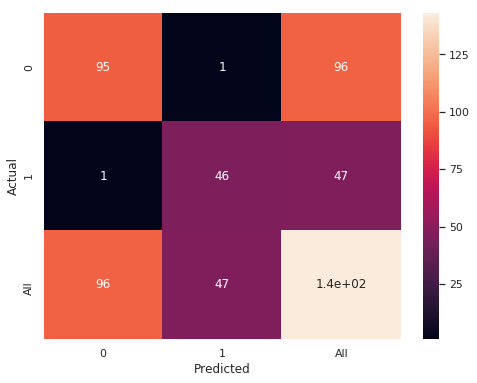

In [124]:
sns.set(rc={'figure.figsize':(8, 6)})
sns.heatmap(CONMAT, annot=True)
plt.show()

In [138]:
from sklearn.metrics import classification_report, jaccard_similarity_score, confusion_matrix

In [139]:
JSS = jaccard_similarity_score(YA, YP)

In [140]:
CM = confusion_matrix(YA, YP)

In [141]:
C_CLASS = sum(CM.diagonal())

In [142]:
TS = sum(sum(CM))

In [143]:
ACC = C_CLASS/TS

In [144]:
'Accuracy : {}, Jaccard Similarity : {}'.format(ACC, JSS)

'Accuracy : 0.986013986013986, Jaccard Similarity : 0.986013986013986'

In [146]:
print(classification_report(YA, YP))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        96
           1       0.98      0.98      0.98        47

   micro avg       0.99      0.99      0.99       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.99      0.99      0.99       143



# Logistic Regression

In [147]:
from sklearn.linear_model import LogisticRegression

In [148]:
model = LogisticRegression()

In [149]:
model.fit(X_TRAIN, Y_TRAIN)

/opt/anaconda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [150]:
model.score(X_TEST, Y_TEST)

0.9790209790209791

In [155]:
YP = model.predict(X_TEST)
YA = Y_TEST

# Analyze the Results

In [156]:
from sklearn.metrics import accuracy_score

In [157]:
JSS = jaccard_similarity_score(YA, YP)

In [158]:
ACC = accuracy_score(YA, YP)

In [159]:
'Accuracy : {}, Jaccard Similarity : {}'.format(ACC, JSS)

'Accuracy : 0.9790209790209791, Jaccard Similarity : 0.9790209790209791'

In [160]:
table = pd.DataFrame({'YA':YA, 'YP':YP})

# Confusion Matrix

In [164]:
CONMAT = pd.crosstab(table.YA, table.YP, rownames=['Actual'], colnames=['Predicted'], margins=True)
CONMAT

Predicted   0   1  All
Actual                
0          95   1   96
1           2  45   47
All        97  46  143

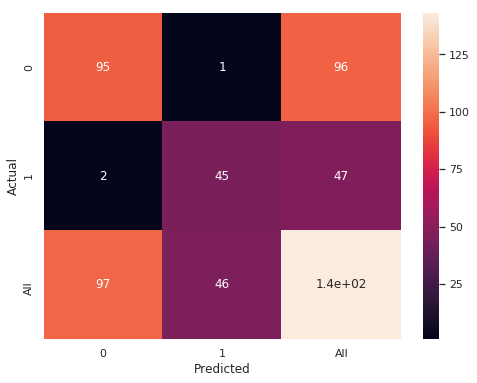

In [163]:
sns.heatmap(CONMAT, annot=True)

In [165]:
print(classification_report(YA, YP))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98        96
           1       0.98      0.96      0.97        47

   micro avg       0.98      0.98      0.98       143
   macro avg       0.98      0.97      0.98       143
weighted avg       0.98      0.98      0.98       143



# ROC and AUC

In [166]:
from sklearn.metrics import roc_curve, roc_auc_score

In [167]:
YPROBA = model.predict_proba(X_TEST)

In [169]:
PROB_TAB = pd.DataFrame({'P(X=0)':YPROBA[:, 0], 'P(X=1)':YPROBA[:, 1]})

In [170]:
PROB_TAB.head()

P(X=0)    P(X=1)
0  9.999986e-01  0.000001
1  9.999373e-01  0.000063
2  1.182691e-02  0.988173
3  4.949749e-09  1.000000
4  9.760842e-01  0.023916

In [171]:
FPR1, TPR1, TH1 = roc_curve(YA, PROB_TAB.iloc[:, 1])

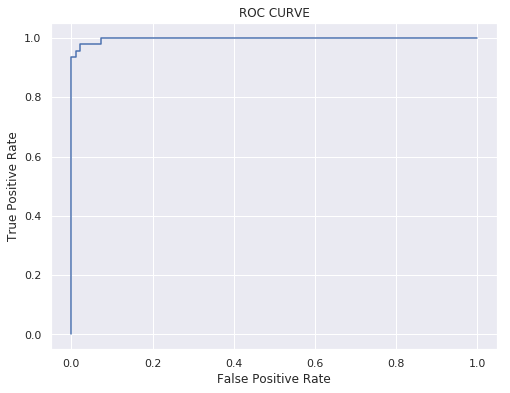

In [177]:
plt.plot(FPR1, TPR1)
plt.title('ROC CURVE')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [175]:
roc_auc_score(Y_TEST, YPROBA[:, 1])

0.9977836879432624

# KNN

In [178]:
from sklearn.neighbors import KNeighborsClassifier

In [179]:
model = KNeighborsClassifier(n_neighbors=20)

In [180]:
model.fit(X_TRAIN, Y_TRAIN)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=20, p=2,
           weights='uniform')

In [181]:
model.score(X_TEST, Y_TEST)

0.951048951048951

In [182]:
YP = model.predict(X_TEST)
YA = Y_TEST

In [183]:
accuracy_score(YA, YP)

0.951048951048951

# Plot

In [10]:
cancer_data.head(1)

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38           122.8     1001.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0           0.1184            0.2776          0.3001               0.1471   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33            184.6   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                   0.1189  

[1 rows x 31 columns]

/opt/anaconda/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/anaconda/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


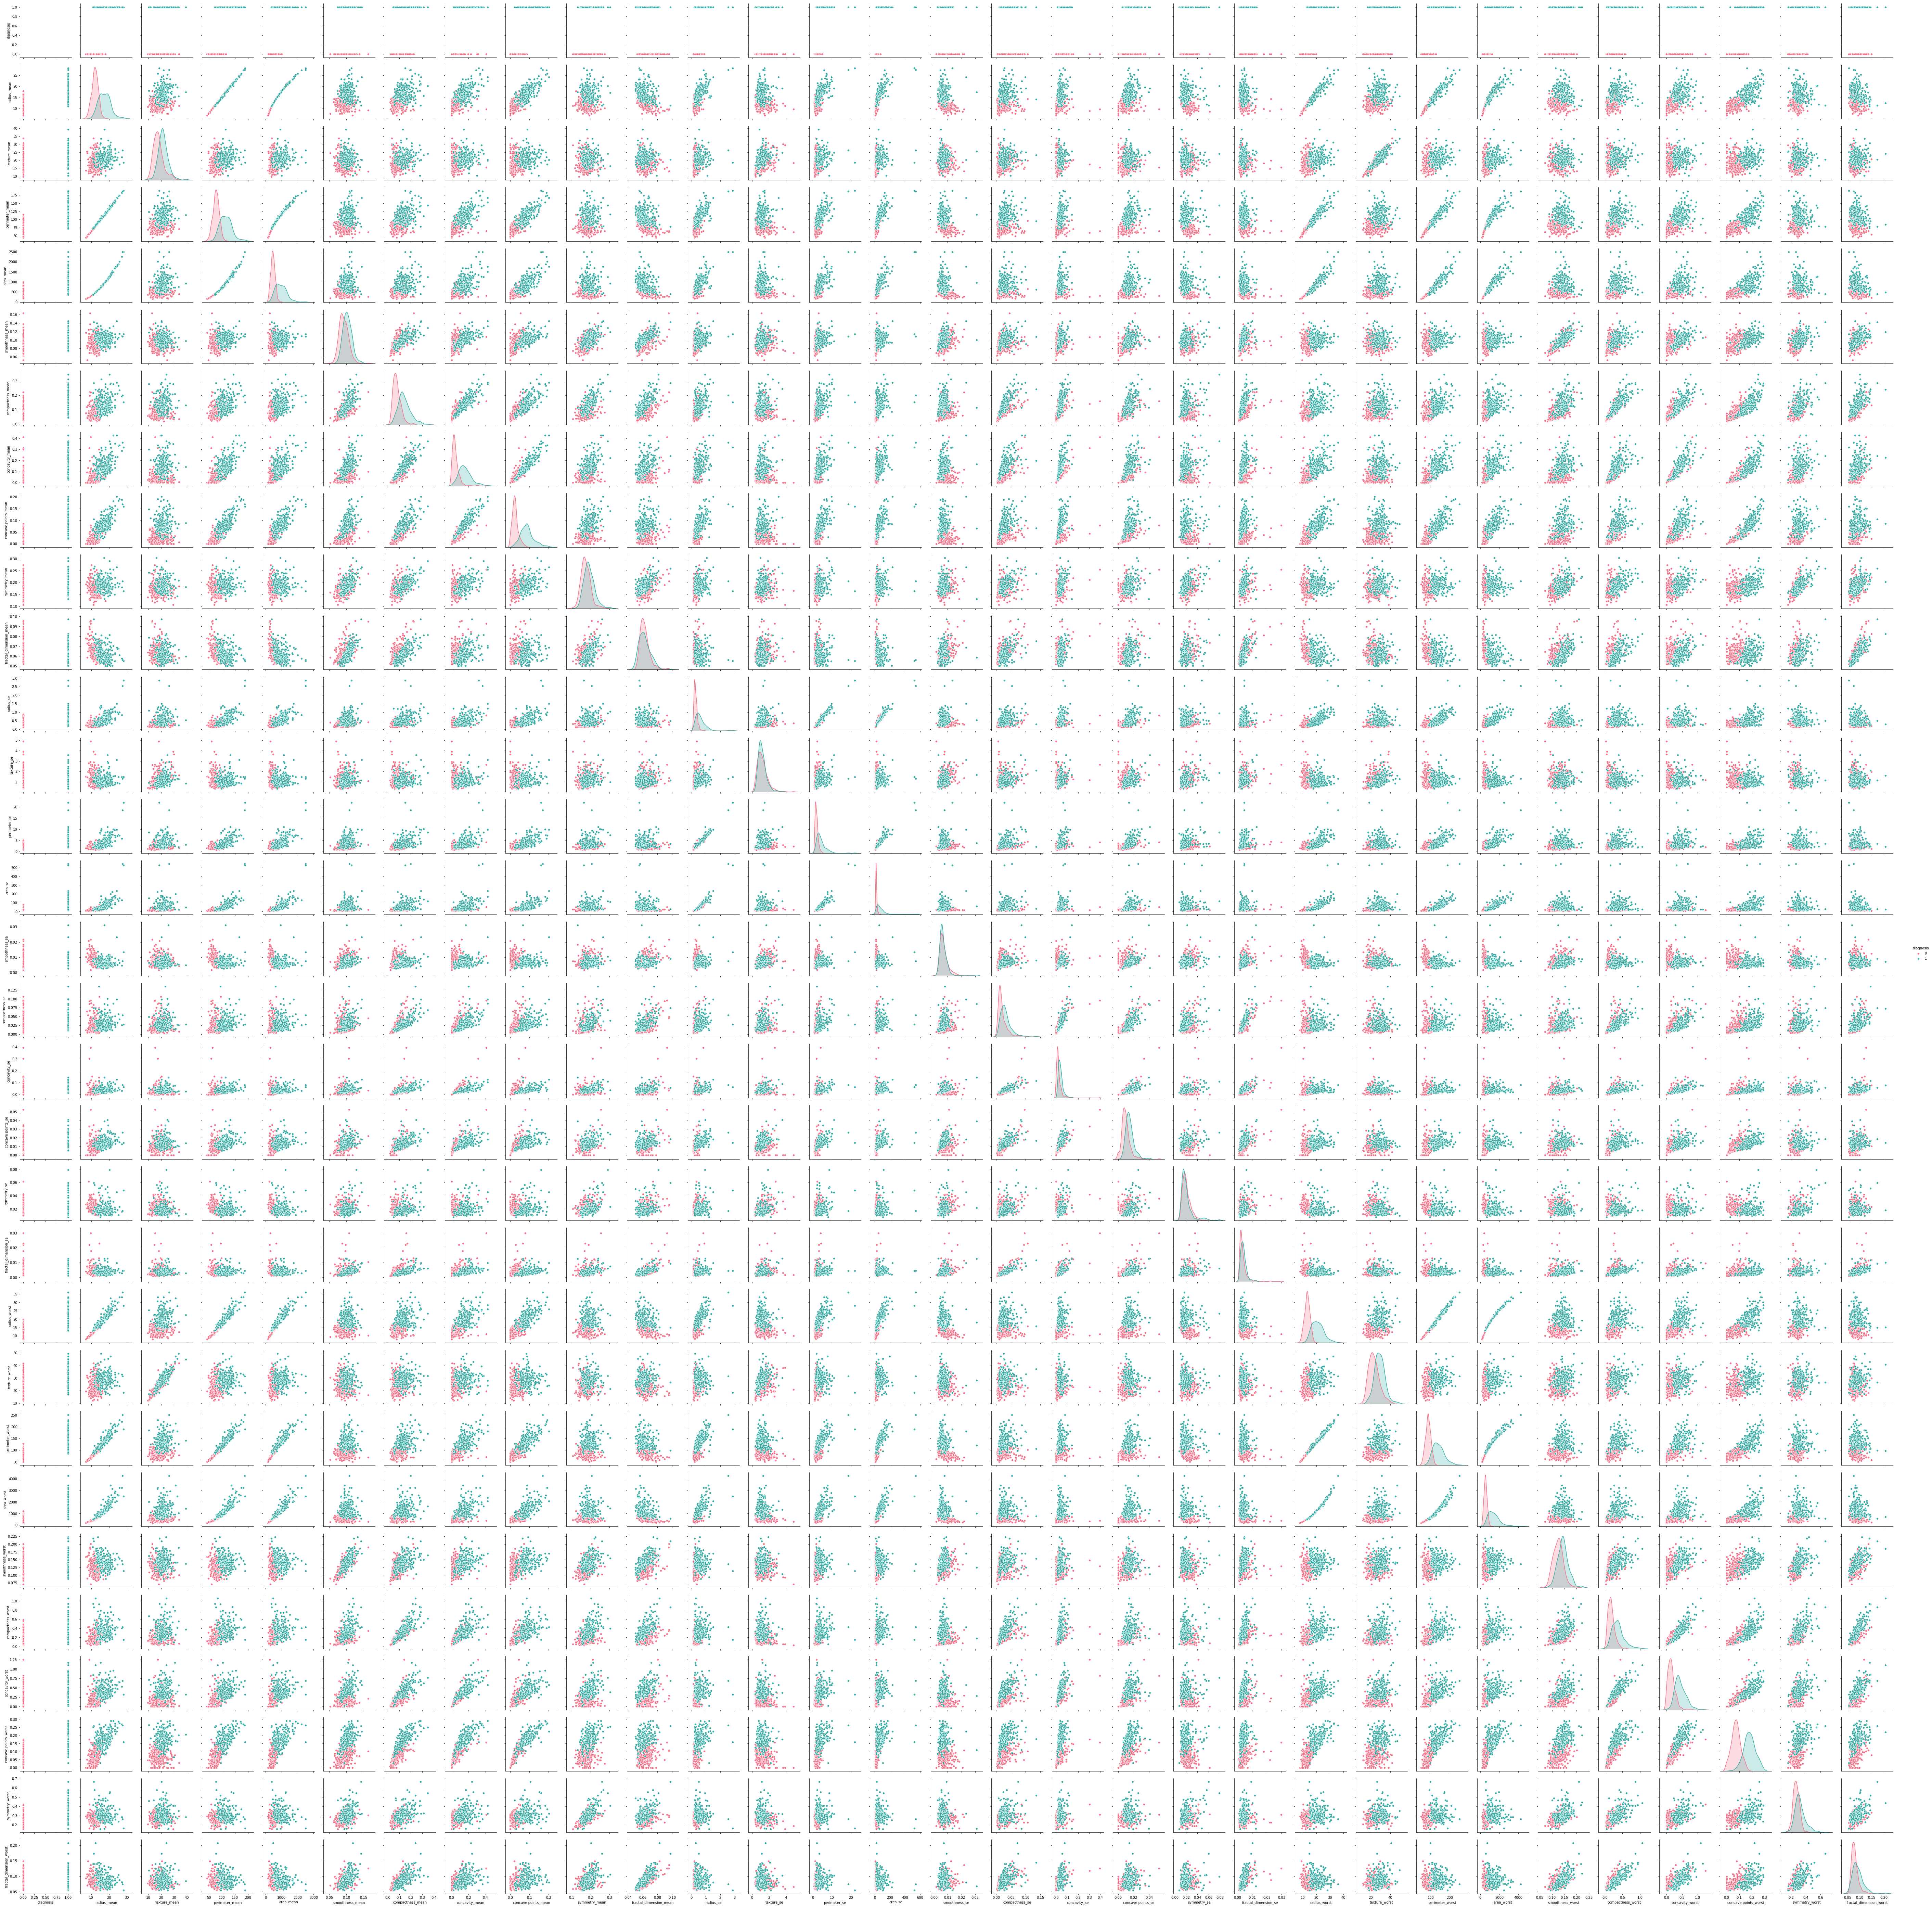

In [11]:
g = sns.pairplot(cancer_data, hue='diagnosis', palette="husl")

In [ ]:
g.savefig('pair_plot.png', dpi=400)